# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.io.wavfile
from IPython.display import Audio

import time


In [60]:
N = 13
n0 = 4

k = np.arange(N)

x = np.ones(N)
z = np.sin(2 * np.pi * k * n0 / N)
y = x * z


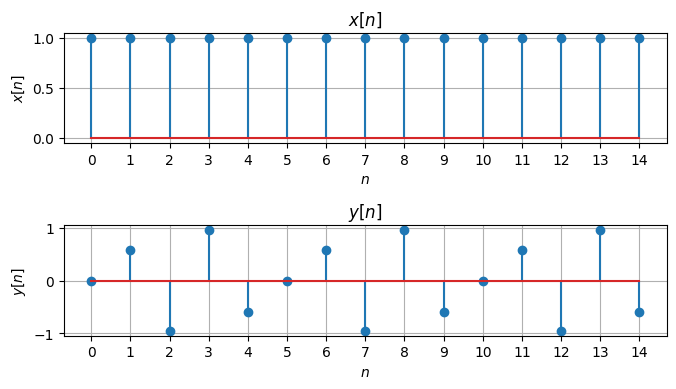

In [53]:
plt.figure(figsize=[7, 4], dpi=100)

plt.subplot(211)
plt.stem(x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.xticks(ticks=np.arange(x.size))
plt.title("$x[n]$")

plt.grid()

plt.subplot(212)
plt.stem(y)
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.xticks(ticks=np.arange(y.size))
plt.title("$y[n]$")
plt.grid()

plt.tight_layout()


$$ x[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}[k-m].$$
$$X(\nu )=\sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi \nu k)=\sum\limits_{k=0}^{N-1}{\exp (-j2\pi \nu k)}=\frac{1-\exp (-j2\pi \nu N)}{1-\exp (-j2\pi \nu )}=$$
$$=\frac{{{e}^{-j\pi \nu N}}}{{{e}^{-j\pi \nu }}}\frac{({{e}^{j\pi \nu N}}-{{e}^{-j\pi \nu N}})}{({{e}^{j\pi \nu }}-{{e}^{-j\pi \nu }})}=\frac{\sin (N\pi \nu )}{\sin (\pi \nu )}\exp (-j(N-1)\pi \nu ).$$
Модуль ДВПФ $\left| X(\nu ) \right|=\left| \dfrac{\sin (N\pi \nu )}{\sin (\pi \nu )} \right|$, фаза $\varphi(\nu)= \text{arctg} \dfrac{\text{Im} X(\nu)}{\text{Re} X(\nu)}$


$$y[k] = x[k] \cos\left(2\pi k\dfrac{n_0}{N}\right) = x[k] z[k]$$
$$Y[\nu] = X[\nu] \otimes Z[\nu]$$
$$Z[\nu] = \frac{1}{2} \delta \left(\nu - \frac{n0}{N}\right) + \frac{1}{2} \delta \left(\nu + \frac{n0}{N}\right) $$
$$Y[\nu] = \frac{1}{2} X \left[\nu - \frac{n0}{N}\right] + \frac{1}{2} X \left[\nu + \frac{n0}{N}\right] $$


In [61]:
def dtft(x, M=1025):
    return -0.5 + np.arange(M) / M, np.fft.fftshift(np.fft.fft(x, M))


In [62]:
def rect_window_dtft(N, n0 = 0, M=1025):
    nu = -0.5 + np.arange(M) / M
    nu0 = n0 / N
    return np.array(nu), np.sin(N * np.pi * (nu - nu0)) / np.sin(np.pi * (nu - nu0)) * np.exp(-1j * (N - 1) * np.pi * (nu - nu0))


In [63]:
nu_X1, X1 = rect_window_dtft(N, 0)
nu_X2, X2 = dtft(x)

nu_Z1, Z1 = rect_window_dtft(N, n0)
nu_Z2, Z2 = rect_window_dtft(N, -n0)

nu_Y1, Y1 = nu_Z1, 1 / 2 * Z1 + 1 / 2 * Z2
nu_Y2, Y2 = dtft(y)


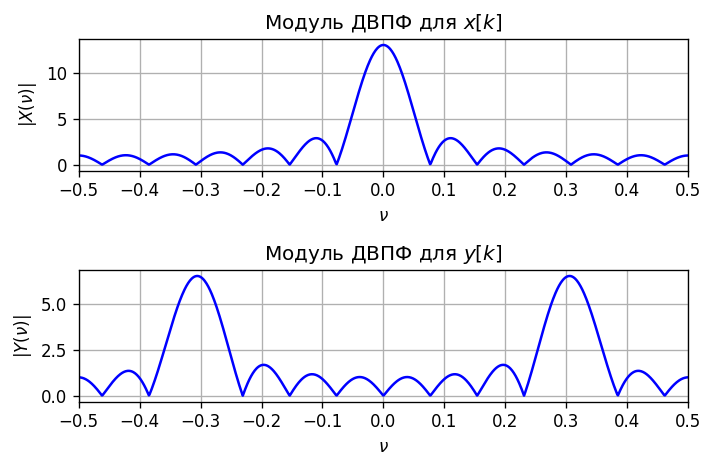

In [66]:
plt.figure(figsize=[6, 4], dpi=120)

ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_X1, abs(X1), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_Y1, abs(Y1), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()


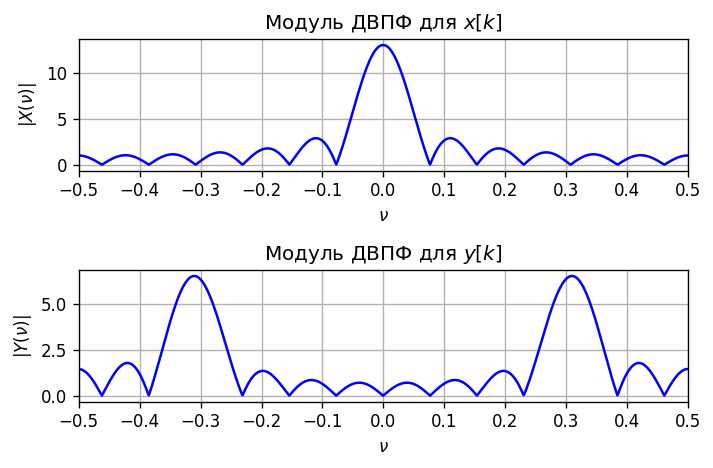

In [65]:
plt.figure(figsize=[6, 4], dpi=120)

ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_X2, abs(X2), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_Y2, abs(Y2), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()


## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

In [77]:
N = 15

k = np.arange(N)
x = np.random.rand(N)
nu, X = dtft(x)


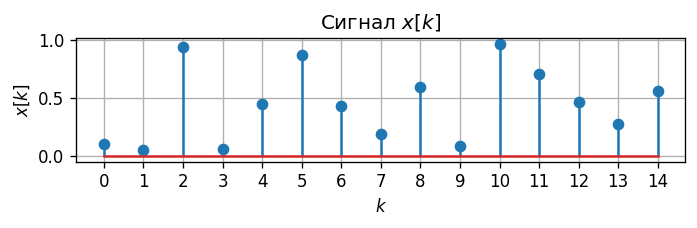

In [78]:
figure1 = plt.figure(figsize=[6, 2], dpi=120)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(k, x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()


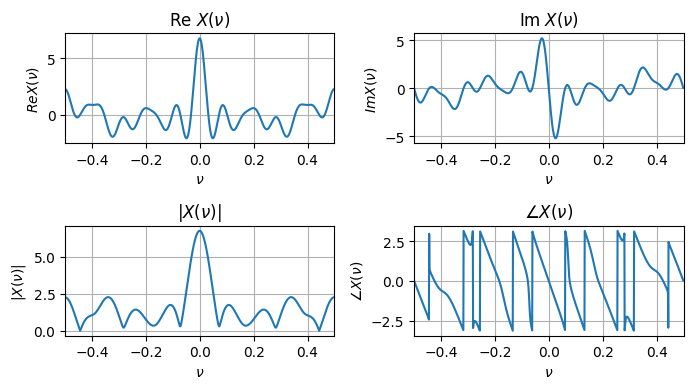

In [79]:
plt.figure(figsize=[7, 4], dpi=100)

plt.subplot(221)
plt.plot(nu, X.real)
plt.xlabel("$\\nu$")
plt.ylabel("$Re X(\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("Re $X(\\nu)$")
plt.grid()

plt.subplot(222)
plt.plot(nu, X.imag)
plt.xlabel("$\\nu$")
plt.ylabel("$Im X(\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("Im $X(\\nu)$")
plt.grid()

plt.subplot(223)
plt.plot(nu, abs(X))
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|X(\\nu)|$")
plt.grid()

plt.subplot(224)
plt.plot(nu, np.angle(X))
plt.xlabel("$\\nu$")
plt.ylabel("$ \\angle X(\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("$ \\angle X(\\nu)$")
plt.grid()

plt.tight_layout()


# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

In [98]:
x = np.array([12.8, 6.8, 3.2, 1.6, 0.8, 0.4, 0.2, 0.1])
n0 = 1

k = np.arange(len(x))
y_0 = x * np.exp(-1j * 2 * np.pi / len(x) * n0 * k)

X = np.fft.fft(x)
Y = np.roll(X, -n0)
y_1 = np.fft.ifft(Y)


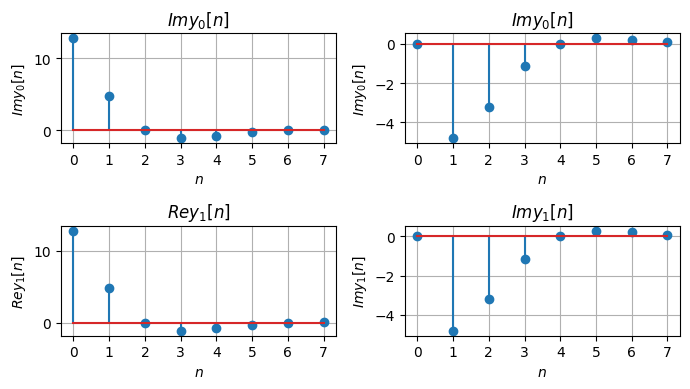

In [100]:
plt.figure(figsize=[7, 4], dpi=100)

plt.subplot(221)
plt.stem(y_0.real)
plt.xlabel("$n$")
plt.ylabel("$Im y_0[n]$")
plt.xticks(ticks=np.arange(y_0.size))
plt.title("$Im y_0[n]$")
plt.grid()

plt.subplot(222)
plt.stem(y_0.imag)
plt.xlabel("$n$")
plt.ylabel("$Im y_0[n]$")
plt.xticks(ticks=np.arange(y_0.size))
plt.title("$Im y_0[n]$")
plt.grid()

plt.subplot(223)
plt.stem(y_1.real)
plt.xlabel("$n$")
plt.ylabel("$Re y_1[n]$")
plt.xticks(ticks=np.arange(y_1.size))
plt.title("$Re y_1[n]$")
plt.grid()

plt.subplot(224)
plt.stem(y_1.imag)
plt.xlabel("$n$")
plt.ylabel("$Im y_1[n]$")
plt.xticks(ticks=np.arange(y_1.size))
plt.title("$Im y_1[n]$")
plt.grid()

plt.tight_layout()


## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


In [108]:
N = 12
X = np.zeros(N, dtype = complex)
X[0] = 12
X[1] = -7 - 5j
X[2] = 1 - 8j
X[3] = 4 + 3j
X[4] = 2 + 6j
X[5] = 4 - 4j

for i in range(len(X) // 2):
    X[N - 1 - i] = X[i].conjugate()

print("mean x[k] = ", X[0].real / N)
print("energy x[k] = ", sum(abs(X * X)) / N)
print("energy x[k] = ", sum(abs(X * X)) / N ** 2)

x = np.fft.ifft(X)

print("mean x[k] = ", sum(x).real / N)
print("energy x[k] = ", sum(abs(x * x)))
print("energy x[k] = ", sum(abs(x * x)) / N)


mean x[k] =  1.0
energy x[k] =  63.333333333333336
energy x[k] =  5.277777777777778
mean x[k] =  1.0
energy x[k] =  63.33333333333333
energy x[k] =  5.277777777777778


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

In [125]:
N = 12
r1 = 3
r2 = 5

k = np.arange(N)
x = np.cos(2 * np.pi / N * r1 * k) + np.sin(2 * np.pi / N * r2 * k)

X_1 = np.zeros(N, dtype = complex)
for i in range(N):
    for j in range(N):
        X_1[i] += x[j] * np.exp(-1j * 2 * np.pi / N * j * i)

def rec_window_fft(N, n0):
    X = np.zeros(N, dtype = complex)
    X[0] = N
    return np.roll(X, n0)

X_2 = 1/2 * rec_window_fft(N, r1) + 1/2 * rec_window_fft(N, -r1) + \
      1/2j * rec_window_fft(N, r2) - 1/2j * rec_window_fft(N, -r2)

X_3 = np.zeros(N, dtype = complex)
X_3[r1]         = 1 / (2 * N)
X_3[N - 1 - r1] = 1 / (2 * N)
X_3[r2]         = 1 / (2j * N)
X_3[N - 1 - r2] = -1 / (2j * N)

X_4 = np.fft.fft(x)


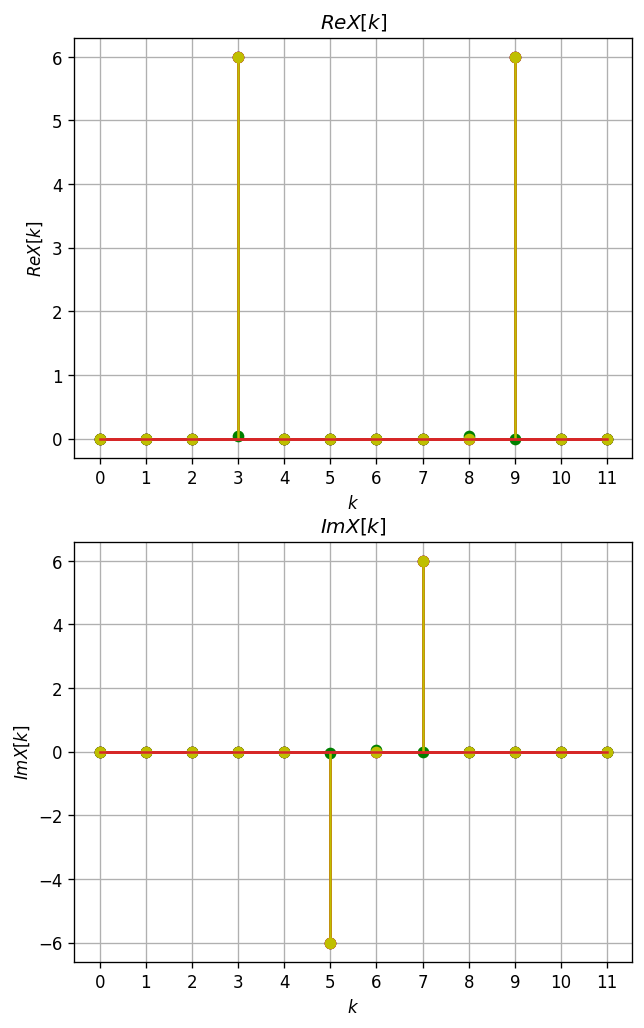

In [129]:
plt.figure(figsize=[6, 10], dpi=120)

plt.subplot(211)
plt.stem(X_1.real, 'b')
plt.stem(X_2.real, 'r')
plt.stem(X_3.real, 'g')
plt.stem(X_4.real, 'y')
plt.xlabel("$k$")
plt.ylabel("$Re X[k]$")
plt.xticks(ticks=np.arange(x.size))
plt.title("$Re X[k]$")
plt.grid()

plt.subplot(212)
plt.stem(X_1.imag, 'b')
plt.stem(X_2.imag, 'r')
plt.stem(X_3.imag, 'g')
plt.stem(X_4.imag, 'y')
plt.xlabel("$k$")
plt.ylabel("$Im X[k]$")
plt.xticks(ticks=np.arange(x.size))
plt.title("$Im X[k]$")
plt.grid()


# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



In [167]:
N = 15

k = np.arange(N)

w = np.ones(N)
W = np.fft.fft(w)

y = np.hstack([w, np.zeros(N)])
Y = np.fft.fft(y)

W2 = np.fft.fft(w, 2*N)
W4 = np.fft.fft(w, 4*N)
W1024 = np.fft.fft(w, 1025)


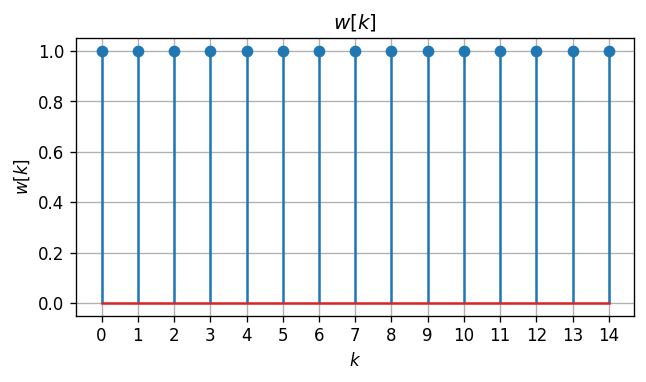

In [168]:
plt.figure(figsize=[6, 3], dpi=120)
plt.stem(w)
plt.xlabel("$k$")
plt.ylabel("$w[k]$")
plt.xticks(ticks=np.arange(w.size))
plt.title("$w[k]$")
plt.grid()


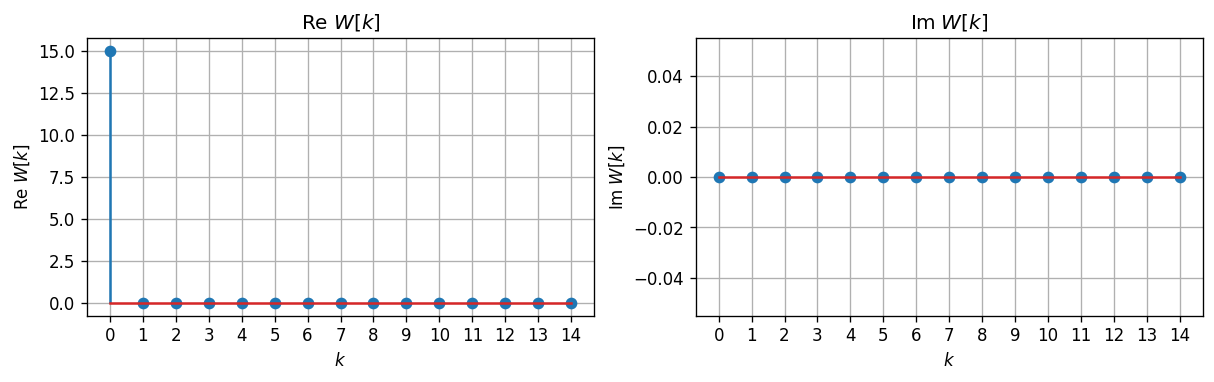

In [169]:
plt.figure(figsize=[12, 3], dpi=120)

plt.subplot(121)
plt.stem(W.real)
plt.xlabel("$k$")
plt.ylabel("Re $W[k]$")
plt.xticks(ticks=np.arange(W.size))
plt.title("Re $W[k]$")
plt.grid()

plt.subplot(122)
plt.stem(W.imag)
plt.xlabel("$k$")
plt.ylabel("Im $W[k]$")
plt.xticks(ticks=np.arange(W.size))
plt.title("Im $W[k]$")
plt.grid()


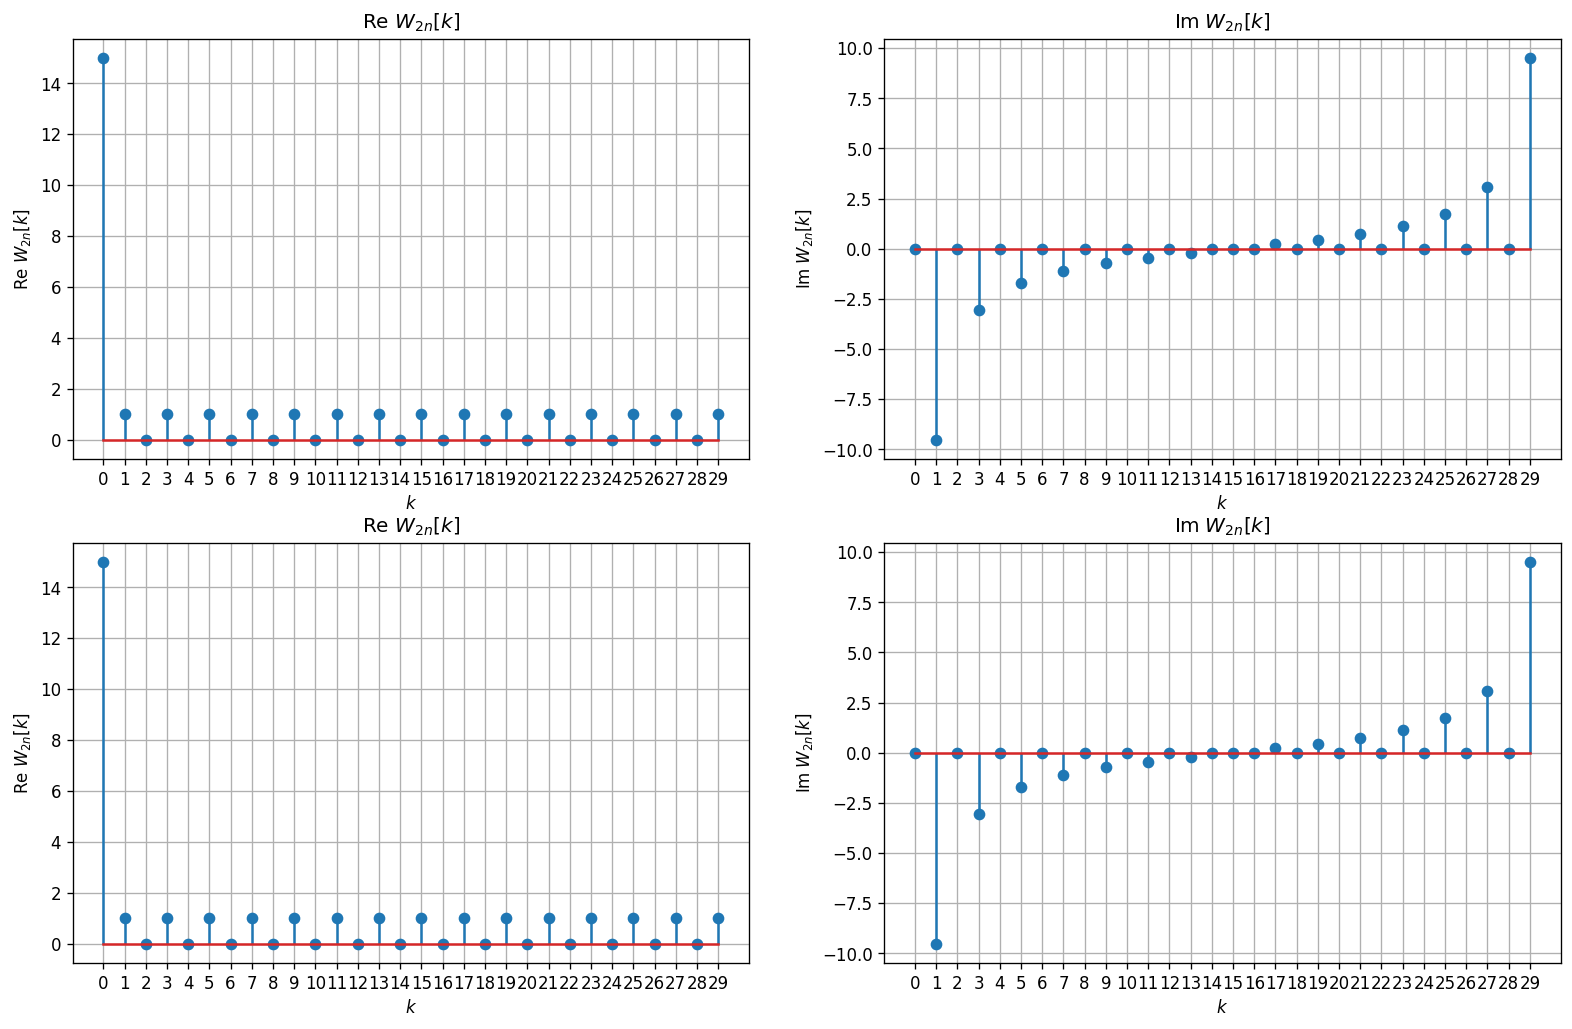

In [170]:
plt.figure(figsize=[16, 10], dpi=120)

plt.subplot(221)
plt.stem(Y.real)
plt.xlabel("$k$")
plt.ylabel("Re $W_{2n}[k]$")
plt.xticks(ticks=np.arange(Y.size))
plt.title("Re $W_{2n}[k]$")
plt.grid()

plt.subplot(222)
plt.stem(Y.imag)
plt.xlabel("$k$")
plt.ylabel("Im $W_{2n}[k]$")
plt.xticks(ticks=np.arange(Y.size))
plt.title("Im $W_{2n}[k]$")
plt.grid()

plt.subplot(223)
plt.stem(W2.real)
plt.xlabel("$k$")
plt.ylabel("Re $W_{2n}[k]$")
plt.xticks(ticks=np.arange(W2.size))
plt.title("Re $W_{2n}[k]$")
plt.grid()

plt.subplot(224)
plt.stem(W2.imag)
plt.xlabel("$k$")
plt.ylabel("Im $W_{2n}[k]$")
plt.xticks(ticks=np.arange(W2.size))
plt.title("Im $W_{2n}[k]$")
plt.grid()


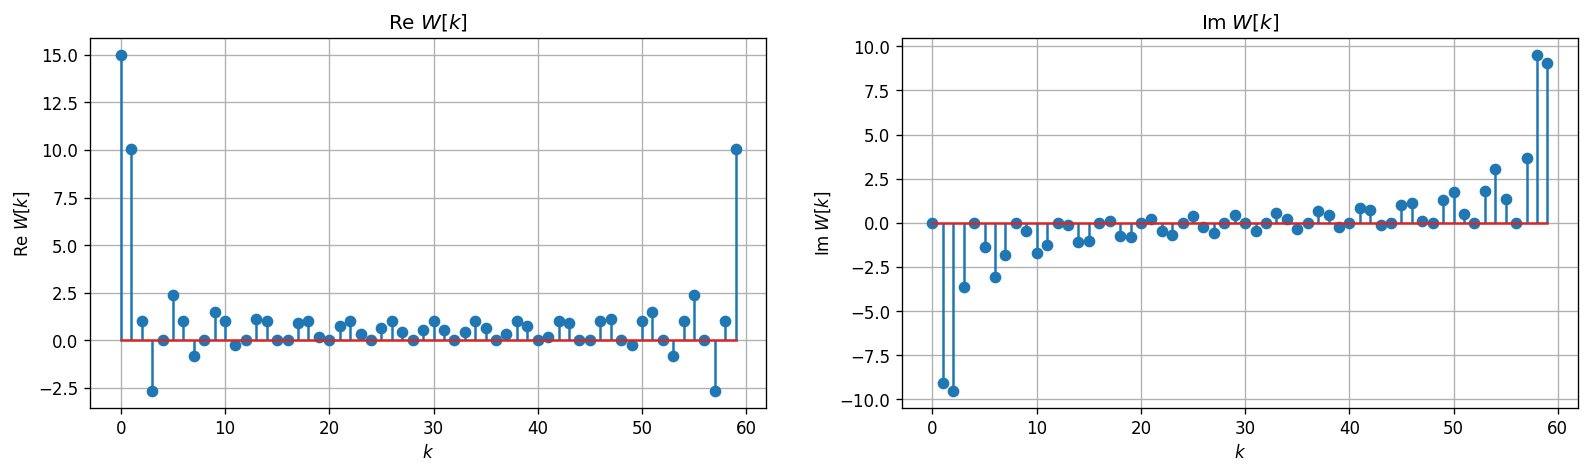

In [171]:
plt.figure(figsize=[16, 4], dpi=120)

plt.subplot(121)
plt.stem(W4.real)
plt.xlabel("$k$")
plt.ylabel("Re $W[k]$")
plt.title("Re $W[k]$")
plt.grid()

plt.subplot(122)
plt.stem(W4.imag)
plt.xlabel("$k$")
plt.ylabel("Im $W[k]$")
plt.title("Im $W[k]$")
plt.grid()


$$W(\nu) = \sum \limits_{k=-\infty}^{+\infty} w[k] exp(-j 2 \pi \nu k) = \sum \limits_0^{N-1} exp(-j 2 \pi \nu k) = \frac{\sin(N \pi \nu)}{\sin( \pi \nu)} exp(-j \pi (N - 1) \nu )$$

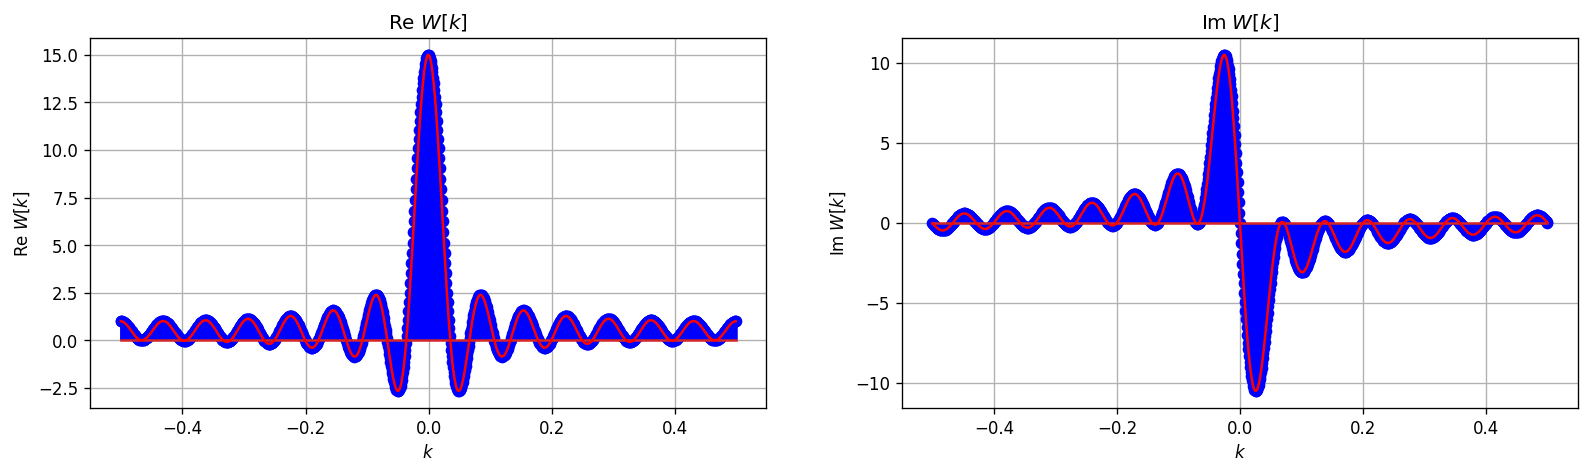

In [178]:
nu, Wn = dtft(w)

plt.figure(figsize=[16, 4], dpi=120)

plt.subplot(121)
plt.stem(nu, np.fft.fftshift(W1024.real), 'b')
plt.plot(nu, Wn.real, 'r')
plt.xlabel("$k$")
plt.ylabel("Re $W[k]$")
plt.title("Re $W[k]$")
plt.grid()

plt.subplot(122)
plt.stem(nu, np.fft.fftshift(W1024.imag), 'b')
plt.plot(nu, Wn.imag, 'r')
plt.xlabel("$k$")
plt.ylabel("Im $W[k]$")
plt.title("Im $W[k]$")
plt.grid()


## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

$$X(\nu) = \sum \limits_{k = - \infty}^{+\infty} \left(\frac{1}{2j} \delta \left( \nu - n - \frac{r1}{N} \right) - \frac{1}{2j}\delta \left( \nu - n + \frac{r1}{N} \right) + \frac{1}{2}\delta \left( \nu - n - \frac{r2}{N} \right) + \frac{1}{2}\delta \left( \nu - n + \frac{r2}{N} \right) \right)$$

In [220]:
N = 16
r1 = 3
r2 = 6

k = np.arange(N)
x = np.sin(2 * np.pi * k * r1 / N) + np.cos(2 * np.pi * k * r2 / N)

X = np.fft.fft(x) / N


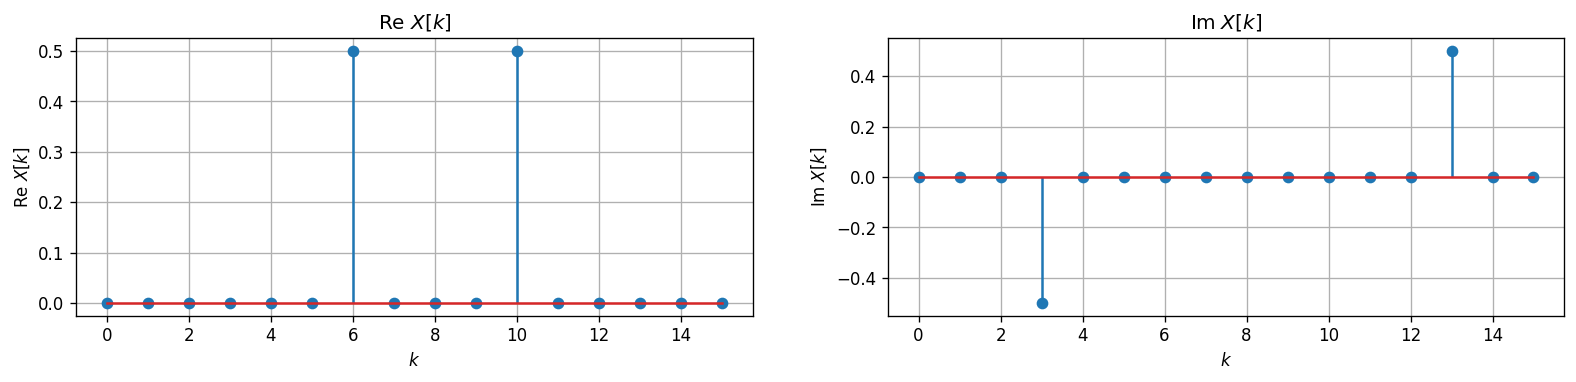

In [223]:
plt.figure(figsize=[16, 3], dpi=120)

plt.subplot(121)
plt.stem(X.real)
plt.xlabel("$k$")
plt.ylabel("Re $X[k]$")
plt.title("Re $X[k]$")
plt.grid()

plt.subplot(122)
plt.stem(X.imag)
plt.xlabel("$k$")
plt.ylabel("Im $X[k]$")
plt.title("Im $X[k]$")
plt.grid()


## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

In [205]:
N = 512
P = 32768

k = np.arange(N)
x = np.sin(2 * np.pi * k * 0.2)


In [210]:
u = np.arange(P) / P
Xn1 = np.zeros(P, dtype='complex')

start = time.time()
for u in range(P):
    Xn1[u] += np.dot(np.exp(-1j * k * 2 * np.pi * u / P), x)

finish = time.time()
print("Time ", time.time()-start, "c")


Time  0.3081698417663574 c


In [211]:
start = time.time()
Xn2 = np.fft.fft(x, P)
finish = time.time()
print("Time ", finish-start, "c")


Time  0.0009291172027587891 c


In [212]:
max(abs(Xn1-Xn2))


np.float64(1.501766657428653e-11)

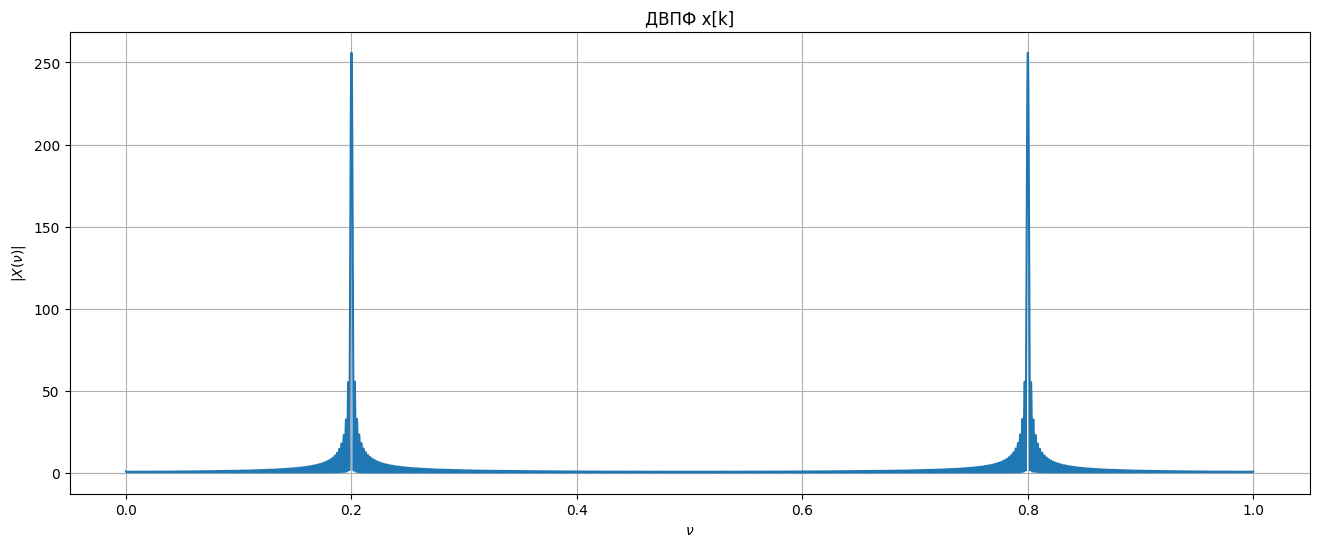

In [217]:
plt.figure(figsize=[16, 6], dpi=100)
plt.plot(np.arange(P)/P, abs(Xn1))
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.title('ДВПФ x[k]')
plt.grid()
plt.show()


## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [182]:
path = 'lecture/wav_files/vibraphone.wav'

Audio(path)


In [184]:
fs, x = scipy.io.wavfile.read(path)

print("Частота дискретизации: ", fs)
print("Шаг в мс: ", 1000/fs)


Частота дискретизации:  44100
Шаг в мс:  0.022675736961451247


In [185]:
time_duration=256
time_delay=10000

x = x[time_delay:(time_delay+time_duration)]


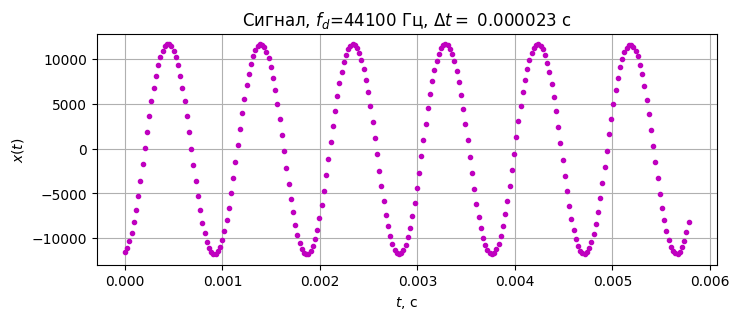

In [186]:
plt.figure(figsize=[8, 3])
plt.plot(np.arange(x.size)/fs, x, 'm.')
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()


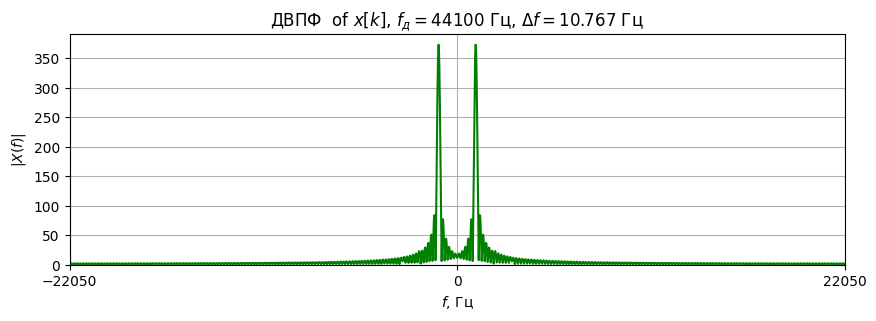

In [187]:
plt.figure(figsize=[10, 3], dpi=100)

M = 4096
nu = -0.5 + np.arange(M) / M

plt.plot(nu * fs, abs(np.fft.fftshift(np.fft.fft(x, M))) / M, 'g');
plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
plt.xticks([-fs/2, 0, fs/2])

plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()


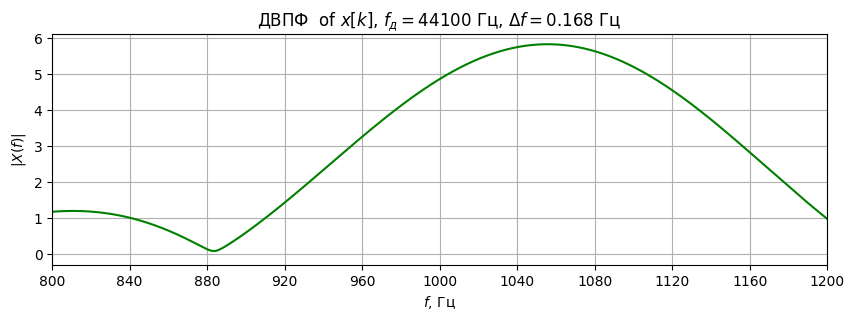

In [203]:
plt.figure(figsize=[10, 3], dpi=100)

M = 4096 * 8 * 8
nu = -0.5 + np.arange(M) / M

plt.plot(nu * fs, abs(np.fft.fftshift(np.fft.fft(x, M))) / M, 'g');
plt.xlim([800, 1200])
plt.xticks(np.arange(800, 1201, 40))

plt.title(u'ДВПФ  of $x[k]$, $f_д=%d$ Гц, $\Delta f=%.3f$ Гц' %(fs, fs/M))
plt.xlabel(u'$f$, Гц')
plt.ylabel(u'$|X(f)|$')
plt.grid()
